# Building Tree Models to understand performance differences between Single Tree, Random Forest and Boosted models for Continuous and Discrete Data

## Boston data set

Following the machine learning workflow to train regression tree, random forest, and boosting methods for **predicting medv**: median value of owner-occupied homes in $1000s.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io

In [2]:
boston = pd.read_csv('boston.csv')

In [3]:
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
1   4.98  24.0  
2   9.14  21.6  
3   4.03  34.7  
4   2.94  33.4  
5   5.33  36.2

#### Data Description & Exploration

In [4]:
#understanding the data features
boston.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

We see that the target variable medv has a range of values from **5-50**. This range would be useful to evaluate the model MSEs in the variable context.

In [5]:
#checking for shape and null values
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


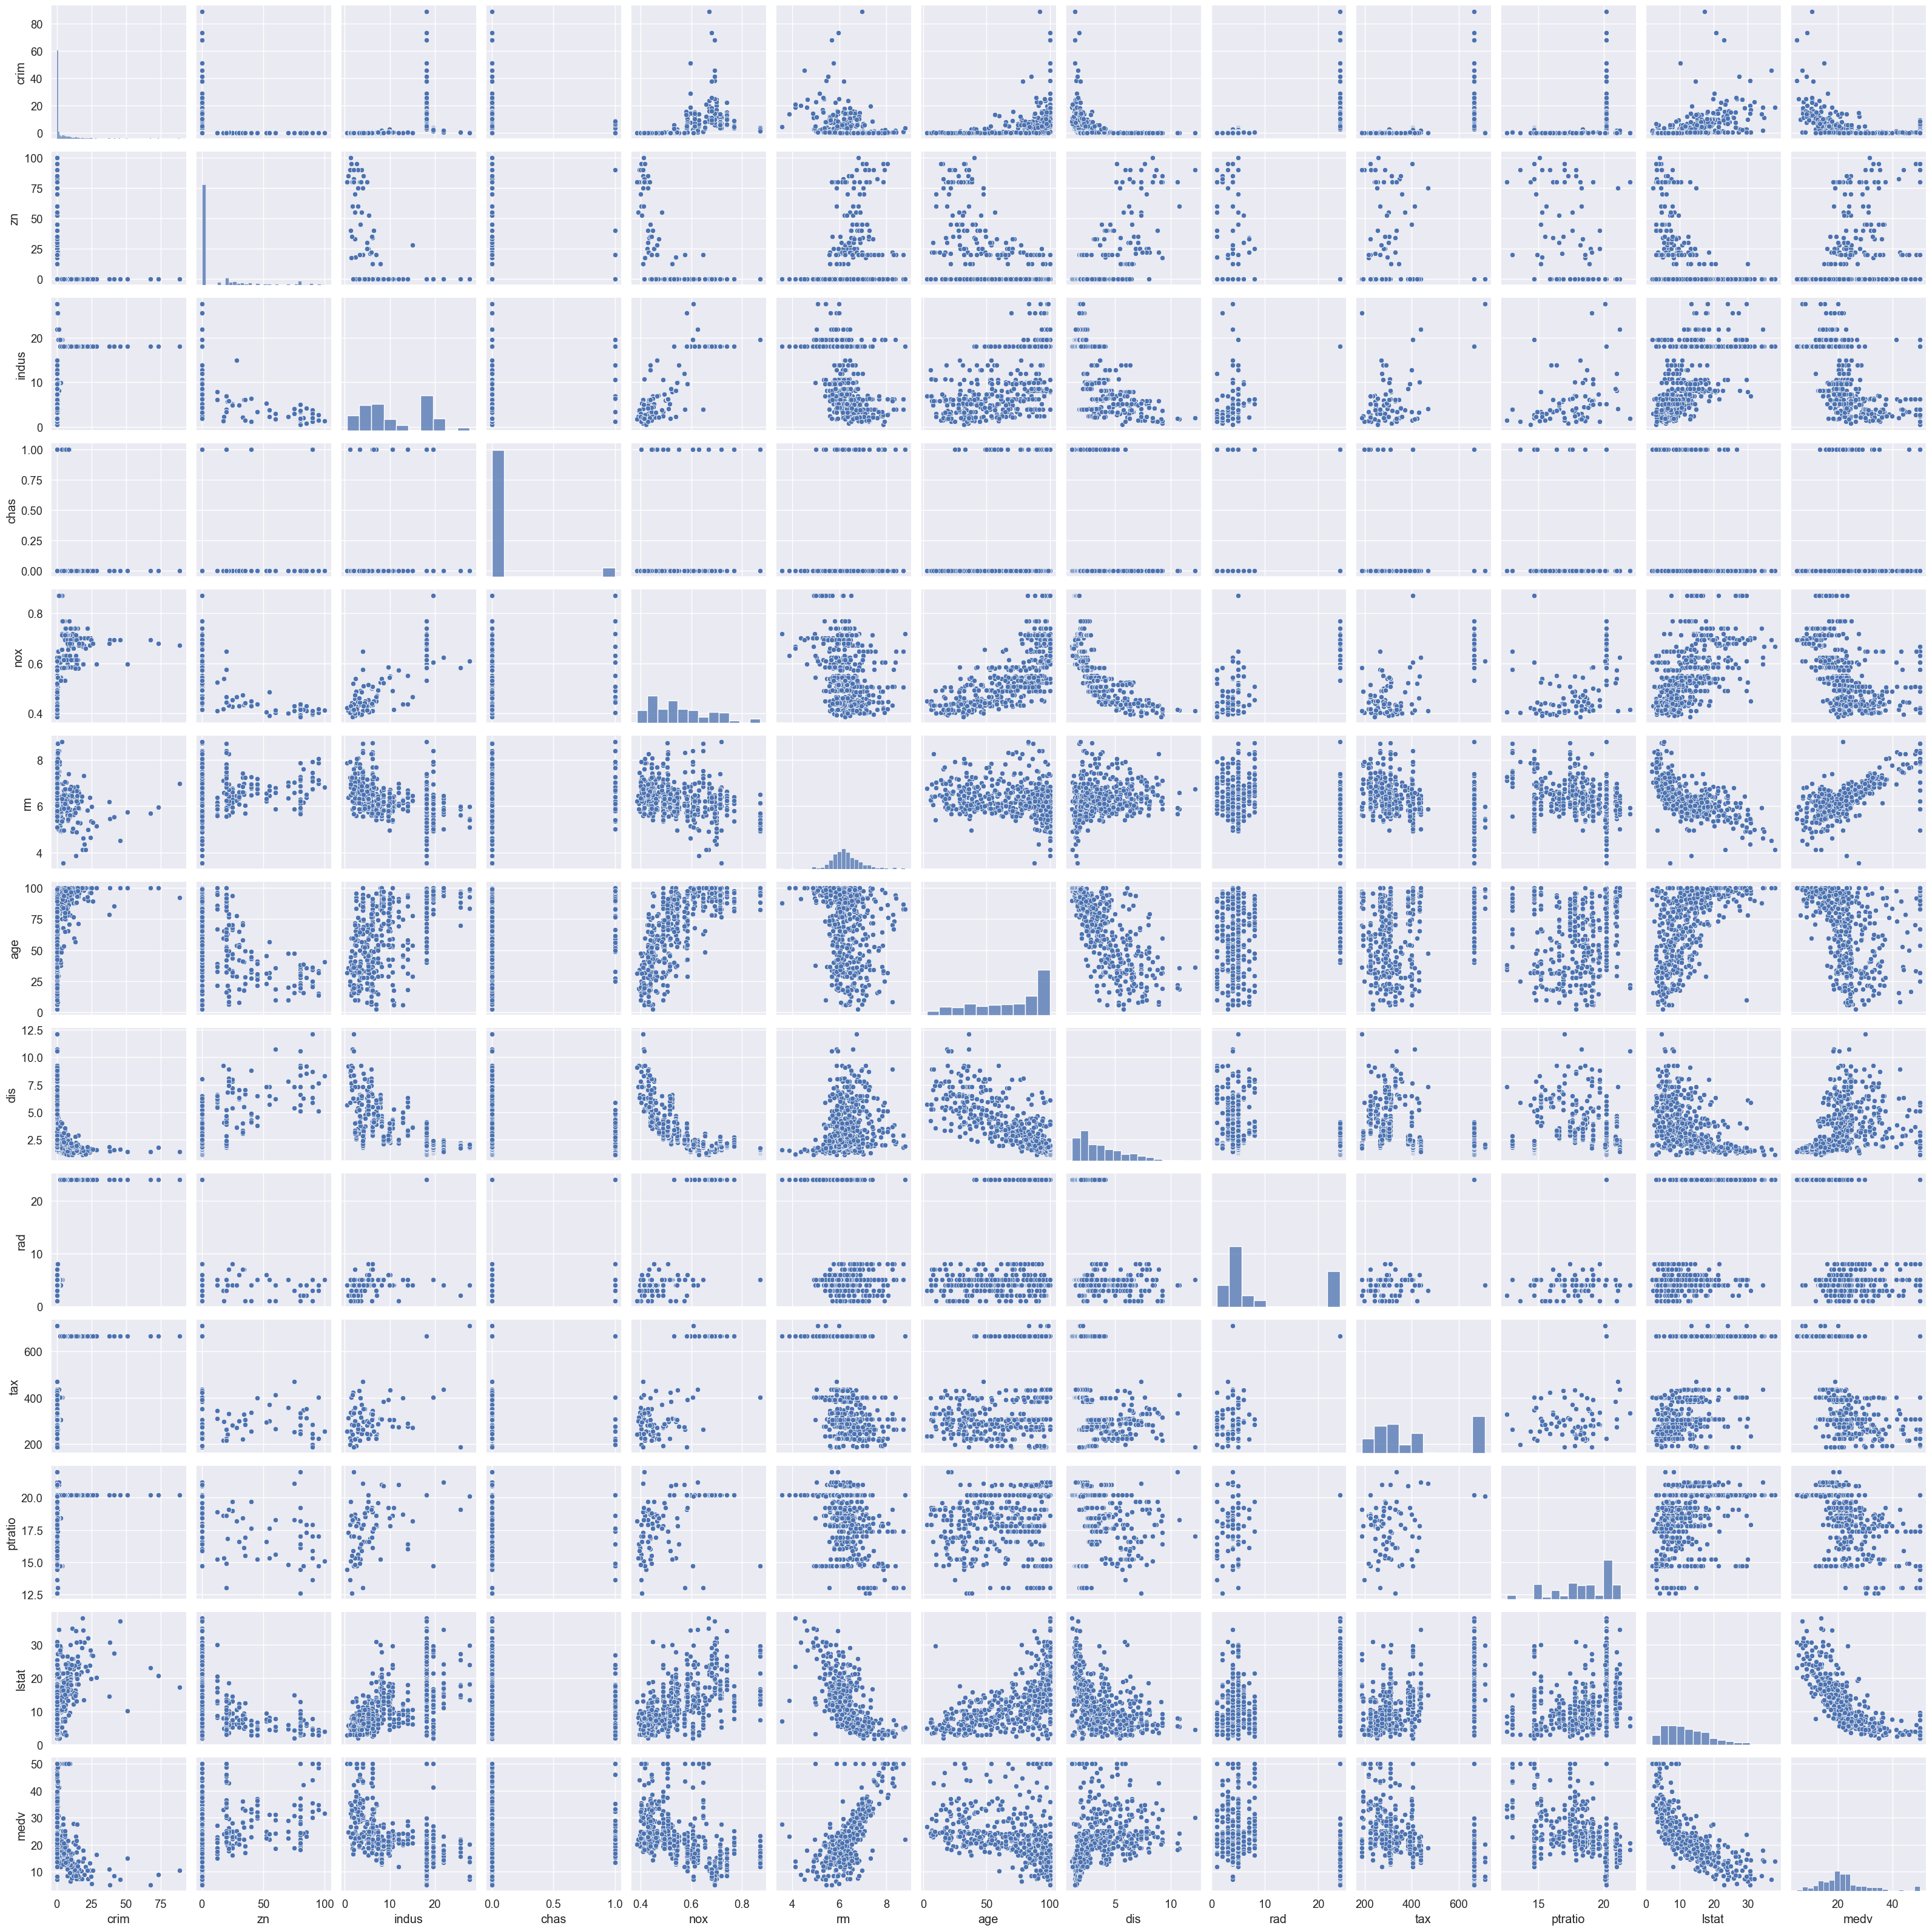

In [7]:
sns.set(font_scale = 1.2)
sns.pairplot(boston)
plt.show()

It is important to look at the relationship between medv and the other variables from the above pairplot.
- There are clear linear relationships with 'rm' and 'lstat'. 
    - It shows that as the average number of rooms per dwelling increases, there is a trend of rising value of homes (as would be expected). 
    - The relationship with lstat highlights that as the percentage proportion of lower status of the population increases, median home values fall.
- There also seems to be a slight downward trend with 'nox' that represents the nitrogen oxides concentration, implying a relationship between environment quality and home values.
- Similar trends are also visible with crime rate ('crim') and proportion of non-retail business acres ('indus').

Such visual understanding can again be tested with the feature importance measures from tree models.

I will now use the Machine Learning workflow to train three models - regression tree, random forest, and boosting methods for predicting medv.

#### Step 1: Splitting the data into test and non-test sets

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
b_train, b_test = train_test_split(boston, train_size = 0.8, random_state = 425)
print("Train set dataset size:", b_train.shape)
print("Test set dataset size:", b_test.shape)

Train set dataset size: (404, 13)
Test set dataset size: (102, 13)


In [5]:
# Training X and y
x_train = b_train.drop('medv', axis = 1)
y_train = b_train.medv
# Test X and y
x_test = b_test.drop('medv', axis = 1)
y_test = b_test.medv

### I Regression Tree

#### Step 2: Model

In [7]:
#pre-processing is skipped because not needed with regression trees

from sklearn.tree import DecisionTreeRegressor, plot_tree

regtree_mod = DecisionTreeRegressor(random_state = 425)

#### Step 3: Building the Pipeline

In [8]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [("model", regtree_mod)])
pipe

Pipeline(steps=[('model', DecisionTreeRegressor(random_state=425))])

#### Step 4: Creating the Tuning Grid

In [33]:
#the parameter tuned here is Cost-Complexity Pruning parameter
#greater the value implies higher the pruning

ccp_alpha_grid = np.linspace(start = 0, stop = 0.2, num = 200)
tuned_parameters = {"model__ccp_alpha": ccp_alpha_grid}
tuned_parameters

{'model__ccp_alpha': array([0.        , 0.00100503, 0.00201005, 0.00301508, 0.0040201 ,
        0.00502513, 0.00603015, 0.00703518, 0.0080402 , 0.00904523,
        0.01005025, 0.01105528, 0.0120603 , 0.01306533, 0.01407035,
        0.01507538, 0.0160804 , 0.01708543, 0.01809045, 0.01909548,
        0.0201005 , 0.02110553, 0.02211055, 0.02311558, 0.0241206 ,
        0.02512563, 0.02613065, 0.02713568, 0.0281407 , 0.02914573,
        0.03015075, 0.03115578, 0.0321608 , 0.03316583, 0.03417085,
        0.03517588, 0.0361809 , 0.03718593, 0.03819095, 0.03919598,
        0.04020101, 0.04120603, 0.04221106, 0.04321608, 0.04422111,
        0.04522613, 0.04623116, 0.04723618, 0.04824121, 0.04924623,
        0.05025126, 0.05125628, 0.05226131, 0.05326633, 0.05427136,
        0.05527638, 0.05628141, 0.05728643, 0.05829146, 0.05929648,
        0.06030151, 0.06130653, 0.06231156, 0.06331658, 0.06432161,
        0.06532663, 0.06633166, 0.06733668, 0.06834171, 0.06934673,
        0.07035176, 0.071356

#### Step 5: Choosing the best model by CV and refitting it on the whole non-test data

In [34]:
from sklearn.model_selection import GridSearchCV

n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

In [35]:
# Fit CV
search.fit(x_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(random_state=425))]),
             param_grid={'model__ccp_alpha': array([0.        , 0.00100503, 0.00201005, 0.00301508, 0.0040201 ,
       0.00502513, 0.00603015, 0.00703518, 0.0080402 , 0.00904523,
       0.01005025, 0.01105528, 0.0120603 , 0.01306533, 0.01407035,
       0.01507538, 0.0160804 , 0.01708543, 0.01809045, 0.01909548,
       0.020100...
       0.17085427, 0.1718593 , 0.17286432, 0.17386935, 0.17487437,
       0.1758794 , 0.17688442, 0.17788945, 0.17889447, 0.1798995 ,
       0.18090452, 0.18190955, 0.18291457, 0.1839196 , 0.18492462,
       0.18592965, 0.18693467, 0.1879397 , 0.18894472, 0.18994975,
       0.19095477, 0.1919598 , 0.19296482, 0.19396985, 0.19497487,
       0.1959799 , 0.19698492, 0.19798995, 0.19899497, 0.2       ])},
             scoring='neg_root_mean_squared_error')

<Figure size 640x480 with 0 Axes>

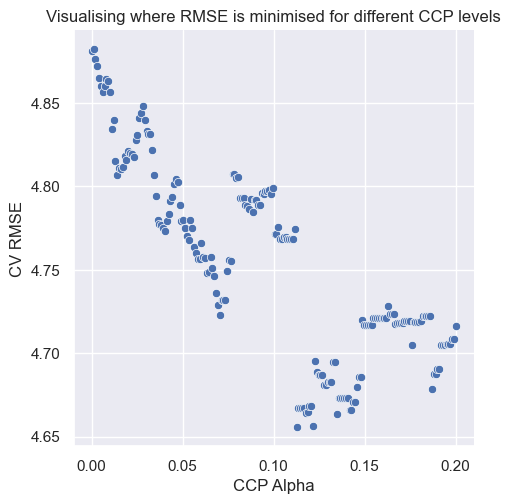

In [36]:
#Visualising the CV results

cv_res = pd.DataFrame({
  "ccp_alpha": np.array(search.cv_results_["param_model__ccp_alpha"]),
  "rmse": -search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.set(font_scale = 1)
sns.relplot(data = cv_res, x = "ccp_alpha", y = "rmse").set(xlabel = "CCP Alpha",ylabel = "CV RMSE")
plt.title("Visualising where RMSE is minimised for different CCP levels")
plt.show()

Visually it looks like RMSE is minimised at approximately an alpha of 0.11.

#### Step 6: Finalising and Testing the Model

In [37]:
#the best model fit on training data
search.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeRegressor(ccp_alpha=0.11256281407035176,
                                       random_state=425))])

We can see that the best fit model has an alpha of exactly 0.11.

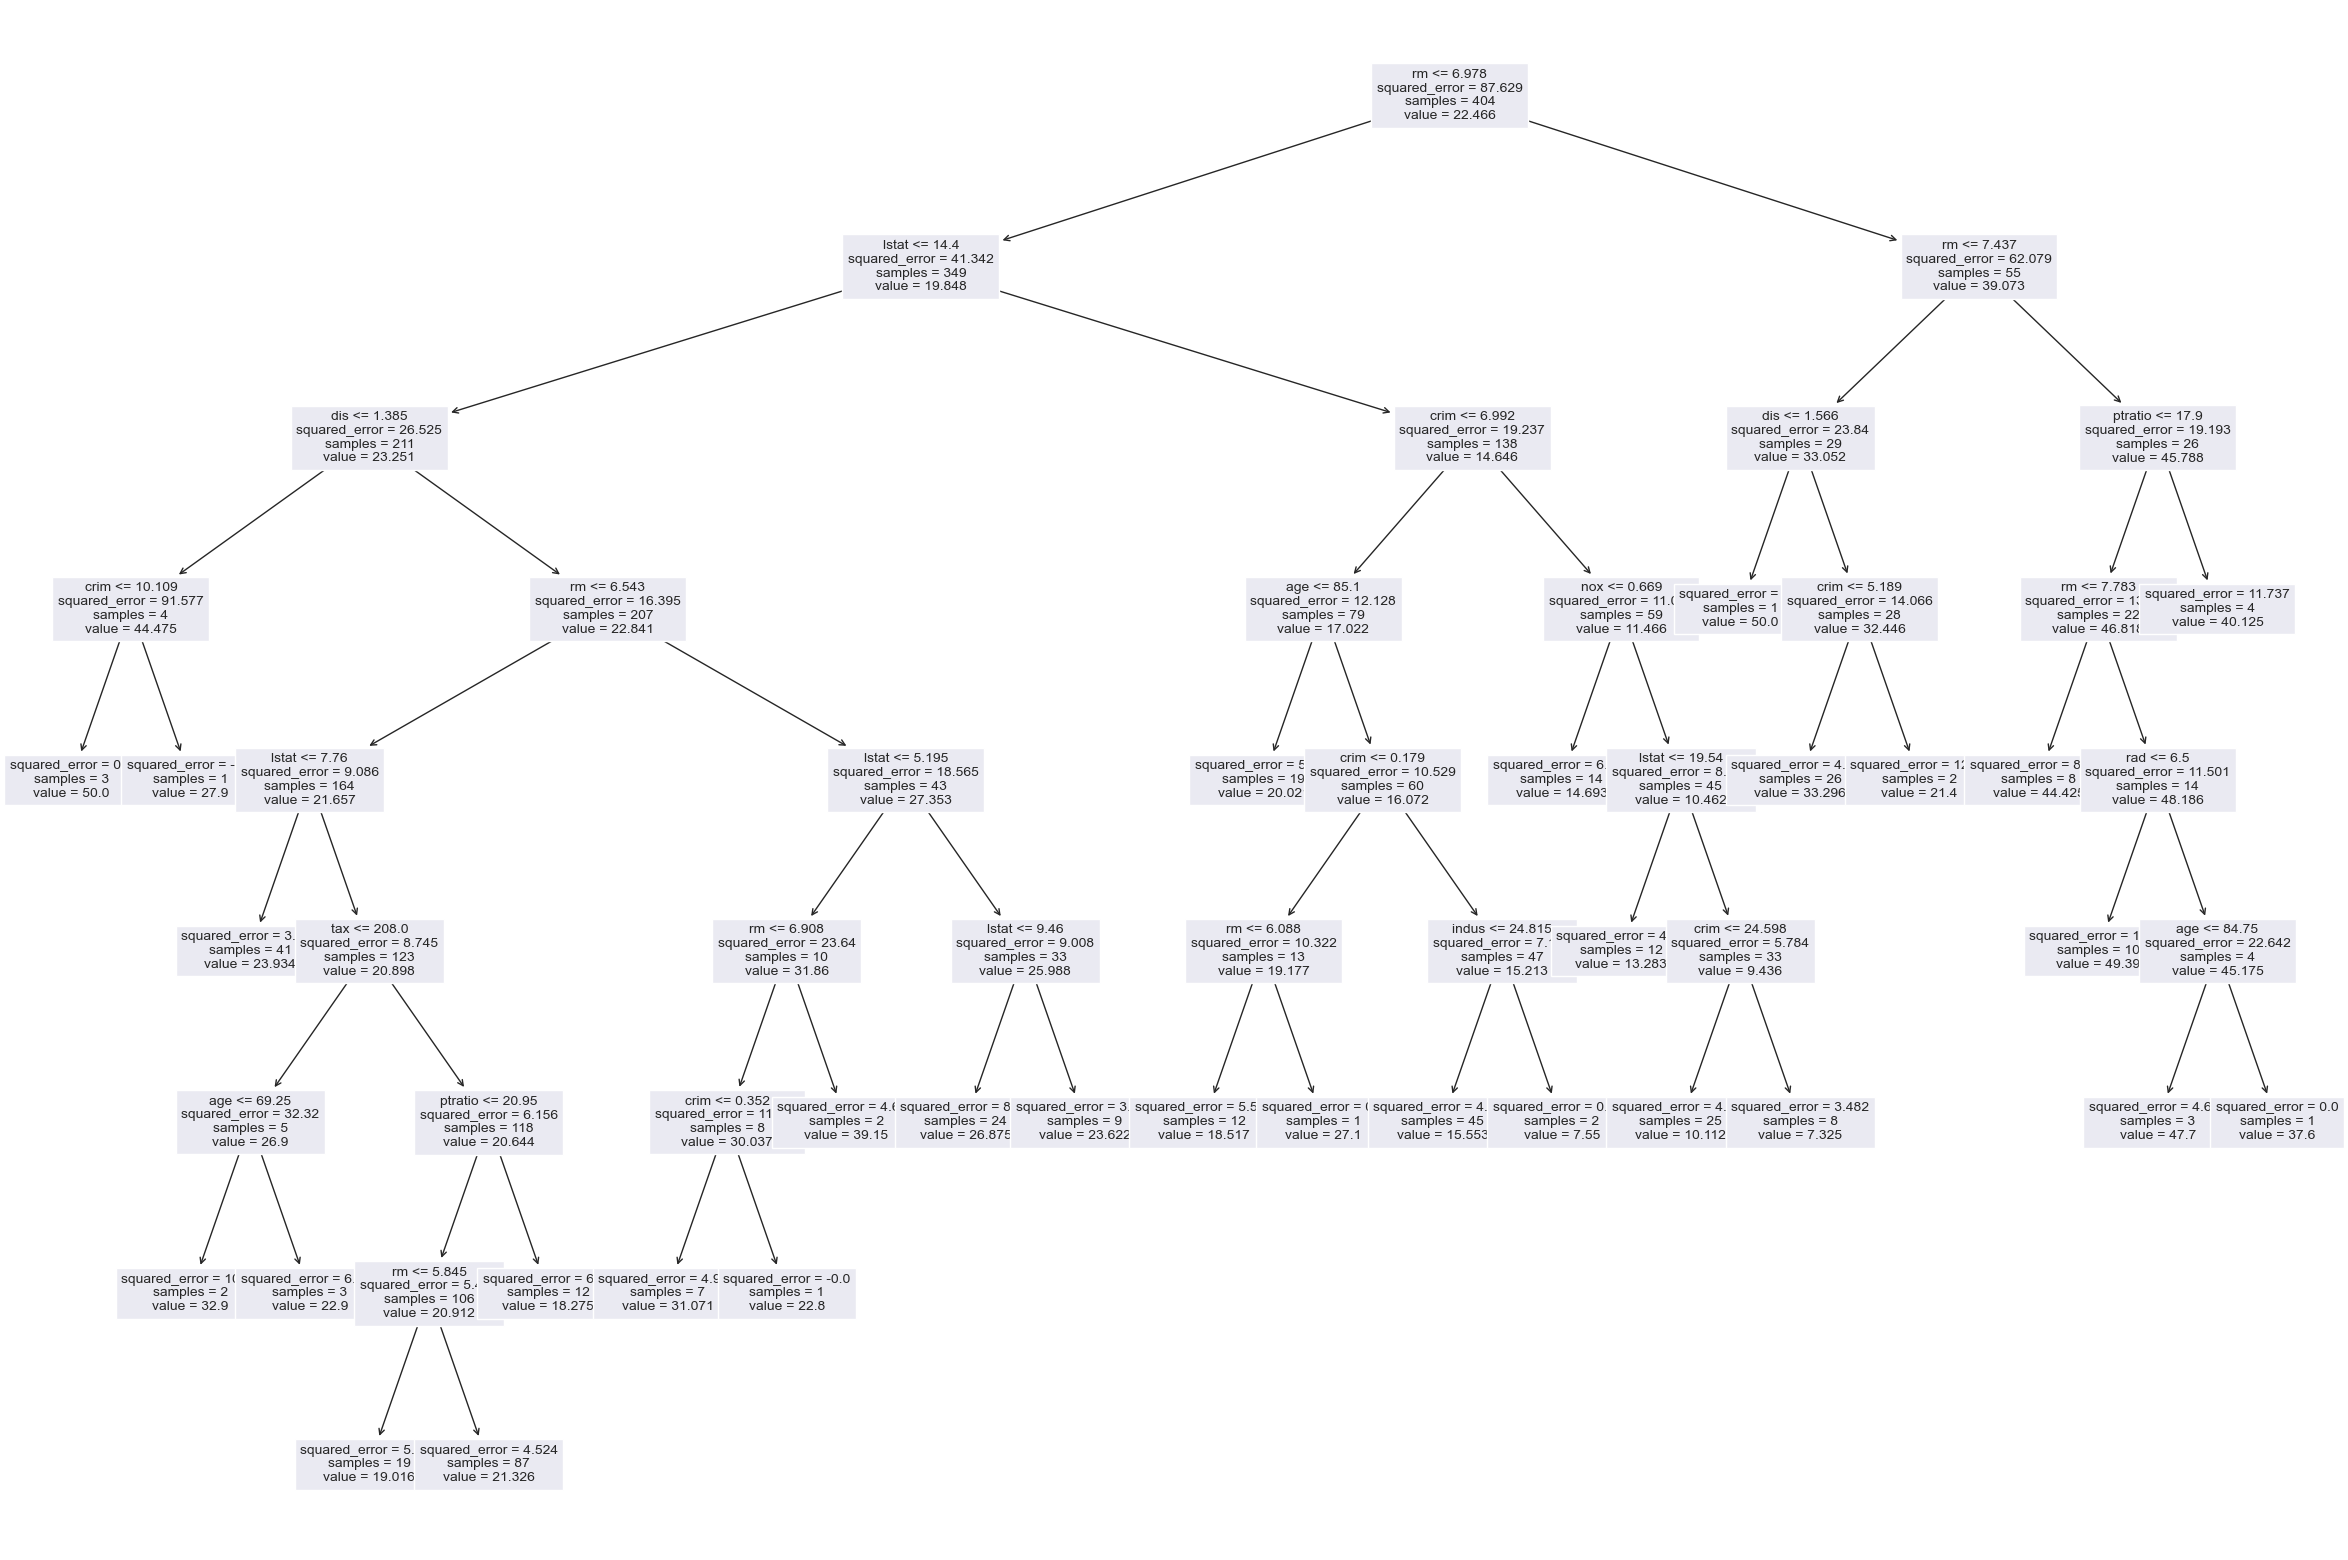

In [39]:
plt.figure(figsize=(30,20))
plot_tree(search.best_estimator_['model'], feature_names = x_train.columns, fontsize=10)
plt.show()

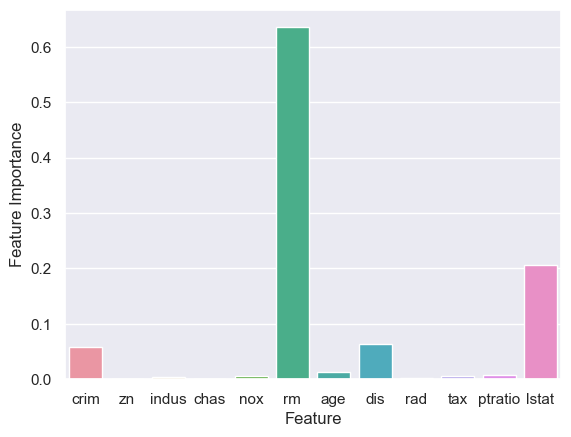

In [40]:
#feature importance

vi_df = pd.DataFrame({
  "feature": x_train.columns,
  "vi": search.best_estimator_['model'].feature_importances_
  })

plt.figure()
sns.barplot(
  data = vi_df,
  x = "feature",
  y = "vi"
  ).set(
    xlabel = "Feature",
    ylabel = "Feature Importance"
)
plt.show()

This shows that, based on the tuned pruning parameter selected, that minimises training RMSE, the most important features for predicting 'medv' are rm, lstat, dis and crim.  
This matches the intuition from the pairplot!

In [49]:
#evaluating out-of-sample performance on test set

from sklearn.metrics import mean_squared_error

regtree_mse = mean_squared_error(
  y_test, 
  search.best_estimator_.predict(x_test), 
  squared = False
  )
regtree_mse

5.174109908778425

Since the output variable has a range from 5 - 50, an RMSE of approximately 5 is quite high and hence, the predictions from the Regression Tree are not very accurate - which is common in the case of tree models.

### II Random Forest

#### Step 2: Model

In [6]:
#using the same train and test sets for consistency

from sklearn.ensemble import RandomForestRegressor

rf_mod =  RandomForestRegressor(
  # Number of trees
  n_estimators = 100, 
  criterion = 'squared_error',
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

#### Step 3: Building the Pipeline

In [8]:
pipe = Pipeline(steps = [
  ("model", rf_mod)
  ])
pipe

Pipeline(steps=[('model',
                 RandomForestRegressor(max_features='sqrt', oob_score=True,
                                       random_state=425))])

#### Step 4: Creating the Tuning Grid

In [9]:
B_grid = [50, 75, 100, 125, 150, 200]
m_grid = ['sqrt', 'log2', 1.0]    #max_features = 1.0 is same as bagging (using all features)
tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }
tuned_parameters  

{'model__n_estimators': [50, 75, 100, 125, 150, 200],
 'model__max_features': ['sqrt', 'log2', 1.0]}

#### Step 5: Choosing the best model by CV and refitting it on the whole non-test data

In [10]:
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  refit = True
  )

<IPython.core.display.Javascript object>

In [11]:
search.fit(x_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(max_features='sqrt',
                                                              oob_score=True,
                                                              random_state=425))]),
             param_grid={'model__max_features': ['sqrt', 'log2', 1.0],
                         'model__n_estimators': [50, 75, 100, 125, 150, 200]},
             scoring='neg_root_mean_squared_error')

<Figure size 640x480 with 0 Axes>

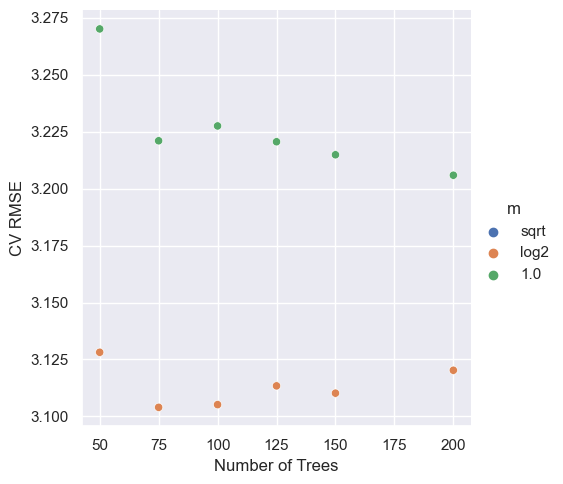

In [13]:
#visualising CV results

cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "rmse": -search.cv_results_["mean_test_score"],
  "m": search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.set(font_scale = 1)
sns.relplot(
  data = cv_res,
  x = "B",
  y = "rmse",
  hue = "m",
  ).set(
    xlabel = "Number of Trees",
    ylabel = "CV RMSE"
)
plt.show()

Visually, it looks like the RMSE is minimised at 75 trees using 'log2' or 'sqrt' number of features in every tree.

In [14]:
cv_res

B      rmse     m
0    50  3.128153  sqrt
1    75  3.103990  sqrt
2   100  3.105178  sqrt
3   125  3.113412  sqrt
4   150  3.110204  sqrt
5   200  3.120257  sqrt
6    50  3.128153  log2
7    75  3.103990  log2
8   100  3.105178  log2
9   125  3.113412  log2
10  150  3.110204  log2
11  200  3.120257  log2
12   50  3.270088   1.0
13   75  3.220988   1.0
14  100  3.227497   1.0
15  125  3.220559   1.0
16  150  3.214847   1.0
17  200  3.205867   1.0

In [ ]:
#the above result shows exact same RMSE for log2 and sqrt and hence they dont show up on graph.

#### Step 6: Finalising and Testing the Model

In [15]:
#the best model after fitting on whole training data
search.best_estimator_

Pipeline(steps=[('model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=75,
                                       oob_score=True, random_state=425))])

This confirms the visual conclusion from plotting the different RMSEs from Cross Validation.

<Figure size 640x480 with 0 Axes>

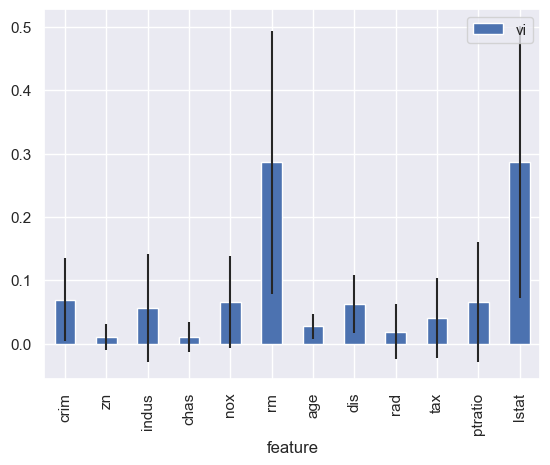

In [17]:
vi_df = pd.DataFrame({
  "feature": x_train.columns,
  "vi": search.best_estimator_['model'].feature_importances_,
  "vi_std": np.std([tree.feature_importances_ for tree in search.best_estimator_['model'].estimators_], axis = 0)
  })              #axis=0 because calculating across col - each col corresponds to a feature from x_train and there are 75
                  #"imp" measures for each feature- so taking std dev for those 75 obs for 1 feature- doing for each feature
plt.figure()
vi_df.plot.bar(x = "feature", y = "vi", yerr = "vi_std")
plt.show()

This shows that, based on the tuned parameters selected, that minimise training RMSE, the most important features for predicting 'medv' are rm and lstat. However, the two also have large standard deviations.

The large standard deviations imply that the importance of these features is not consistent and maybe they are important only in some subsets of the data, which have happened to be sampled more frequently.

In [29]:
#evaluating out-of-sample performance on test set

randf_mse = mean_squared_error(
  y_test, 
  search.best_estimator_.predict(x_test), 
  squared = False
  )
randf_mse

3.675437815724121

Given a range of 5-50 for the output variable, an error of 3.6 is still large, however, it is a significant improvement from the Regression Tree.

### III Boosting

#### Step 2: Model

In [33]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

bst_mod =  AdaBoostRegressor(
  # Default base estimator is DecisionTreeRegressor with max_depth = 3
  base_estimator = DecisionTreeRegressor(max_depth = 3),
  n_estimators = 50, #number of trees- will be tuned
  learning_rate = 1.0,  #will be tuned
  random_state = 425
  )

#### Step 3: Building the Pipeline

In [34]:
pipe = Pipeline(steps = [
  ("model", bst_mod)
  ])
pipe

Pipeline(steps=[('model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                   random_state=425))])

#### Step 4: Creating the Tuning Grid

In [49]:
d_grid = [
  DecisionTreeRegressor(max_depth = 1),
  DecisionTreeRegressor(max_depth = 2),
  DecisionTreeRegressor(max_depth = 3),
  DecisionTreeRegressor(max_depth = 4)
  ]
B_grid = [50, 75, 100, 125, 150, 175]
lambda_grid = np.linspace(start = 0.1, stop = 0.2, num = 10)
#lambda of 1 would mean no shrinkage and giving lot of weight to current estimator

tuned_parameters = {
  "model__base_estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }
tuned_parameters  

{'model__base_estimator': [DecisionTreeRegressor(max_depth=1),
  DecisionTreeRegressor(max_depth=2),
  DecisionTreeRegressor(max_depth=3),
  DecisionTreeRegressor(max_depth=4)],
 'model__n_estimators': [50, 75, 100, 125, 150, 175],
 'model__learning_rate': array([0.1       , 0.11111111, 0.12222222, 0.13333333, 0.14444444,
        0.15555556, 0.16666667, 0.17777778, 0.18888889, 0.2       ])}

#### Step 5: Choosing the best model by CV and refitting it on the whole non-test data

In [50]:
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  refit = True
  )

<IPython.core.display.Javascript object>

In [51]:
search.fit(x_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                                          random_state=425))]),
             param_grid={'model__base_estimator': [DecisionTreeRegressor(max_depth=1),
                                                   DecisionTreeRegressor(max_depth=2),
                                                   DecisionTreeRegressor(max_depth=3),
                                                   DecisionTreeRegressor(max_depth=4)],
                         'model__learning_rate': array([0.1       , 0.11111111, 0.12222222, 0.13333333, 0.14444444,
       0.15555556, 0.16666667, 0.17777778, 0.18888889, 0.2       ]),
                         'model__n_estimators': [50, 75, 100, 125, 150, 175]},
             scoring='neg_root_mean_squared_error')

<Figure size 640x480 with 0 Axes>

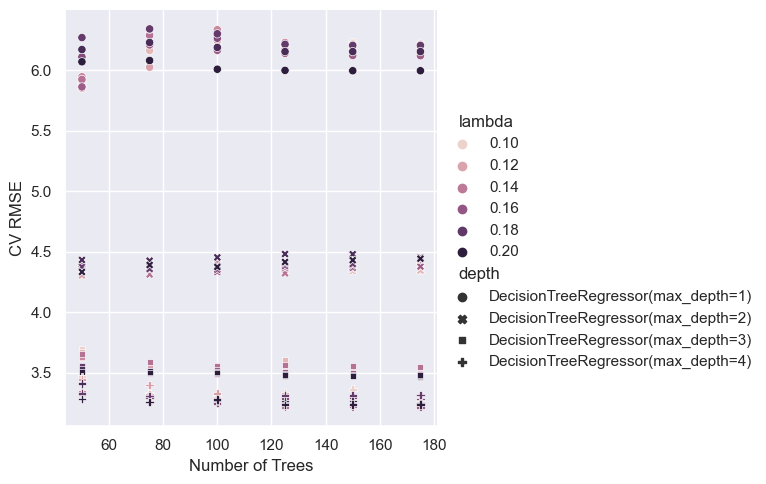

In [52]:
cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "rmse": -search.cv_results_["mean_test_score"],
  "lambda": search.cv_results_["param_model__learning_rate"],
  "depth": search.cv_results_["param_model__base_estimator"],
  })

plt.figure()
sns.relplot(
  data = cv_res,
  x = "B",
  y = "rmse",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "Number of Trees",
    ylabel = "CV RMSE"
)
plt.show()

Visually, it looks like the RMSE is minimised at 175 trees starting with a base learner as a tree of max depth = 4 and with a learning rate/shrinkage parameter of approximately 0.16.

#### Step 6: Finalising and Testing the Model

In [55]:
#the best model after fitting on whole training data
search.best_estimator_

Pipeline(steps=[('model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                                   learning_rate=0.15555555555555556,
                                   n_estimators=175, random_state=425))])

In [56]:
#evaluating out-of-sample performance on test set
boost_mse = mean_squared_error(
  y_test, 
  search.best_estimator_.predict(x_test), 
  squared = False
  )
boost_mse

3.7584506208336905

Surprisingly, the out of sample MSE is higher when compared to Random Forest. This could be due to overfitting. Since, lambda chosen is so small, it would likely require a much larger number of trees for good performance. That is not being attemtped here due to computation time limitations.

### Conclusion:

The best out of sample performance (in terms of lowest error) is seen in case of Random Forest model with 75 trees and 'sqrt' function in choice of feature subset selection.

## Carseats data set

Following the machine learning workflow to train classification tree, random forest, and boosting methods for **classifying Sales <= 8000 versus Sales > 8000**: checking whether the sales at given location would be high or low.

In [2]:
carseats = pd.read_csv('carseats.csv')

In [3]:
carseats = carseats.reset_index()
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
#creating the outcome variable with binary outcome
carseats['y'] = np.where(carseats['Sales'] > 8, "Yes", "No")
#yes implies high sales

In [5]:
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US    y  
0         17   Yes  Yes  Yes  
1         10   Yes  Yes  Yes  
2         12   Yes  Yes  Yes  
3         14   Yes  Yes   No  
4         13   Yes   No   No

#### Data Description & Exploration

In [6]:
#understanding the data features
carseats.describe(include = 'all')

Sales   CompPrice      Income  Advertising  Population  \
count   400.000000  400.000000  400.000000   400.000000  400.000000   
unique         NaN         NaN         NaN          NaN         NaN   
top            NaN         NaN         NaN          NaN         NaN   
freq           NaN         NaN         NaN          NaN         NaN   
mean      7.496325  124.975000   68.657500     6.635000  264.840000   
std       2.824115   15.334512   27.986037     6.650364  147.376436   
min       0.000000   77.000000   21.000000     0.000000   10.000000   
25%       5.390000  115.000000   42.750000     0.000000  139.000000   
50%       7.490000  125.000000   69.000000     5.000000  272.000000   
75%       9.320000  135.000000   91.000000    12.000000  398.500000   
max      16.270000  175.000000  120.000000    29.000000  509.000000   

             Price ShelveLoc         Age   Education Urban   US    y  
count   400.000000       400  400.000000  400.000000   400  400  400  
unique         NaN         3         NaN         NaN     2    2    2  
top            NaN    Medium         NaN         NaN   Yes  Yes   No  
freq           NaN       219         NaN         NaN   282  258  236  
mean    115.795000       NaN   53.322500   13.900000   NaN  NaN  NaN  
std      23.676664       NaN   16.200297    2.620528   NaN  NaN  NaN  
min      24.000000       NaN   25.000000   10.000000   NaN  NaN  NaN  
25%     100.000000       NaN   39.750000   12.000000   NaN  NaN  NaN  
50%     117.000000       NaN   54.500000   14.000000   NaN  NaN  NaN  
75%     131.000000       NaN   66.000000   16.000000   NaN  NaN  NaN  
max     191.000000       NaN   80.000000   18.000000   NaN  NaN  NaN

In [7]:
#checking for shape and null values
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  y            400 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


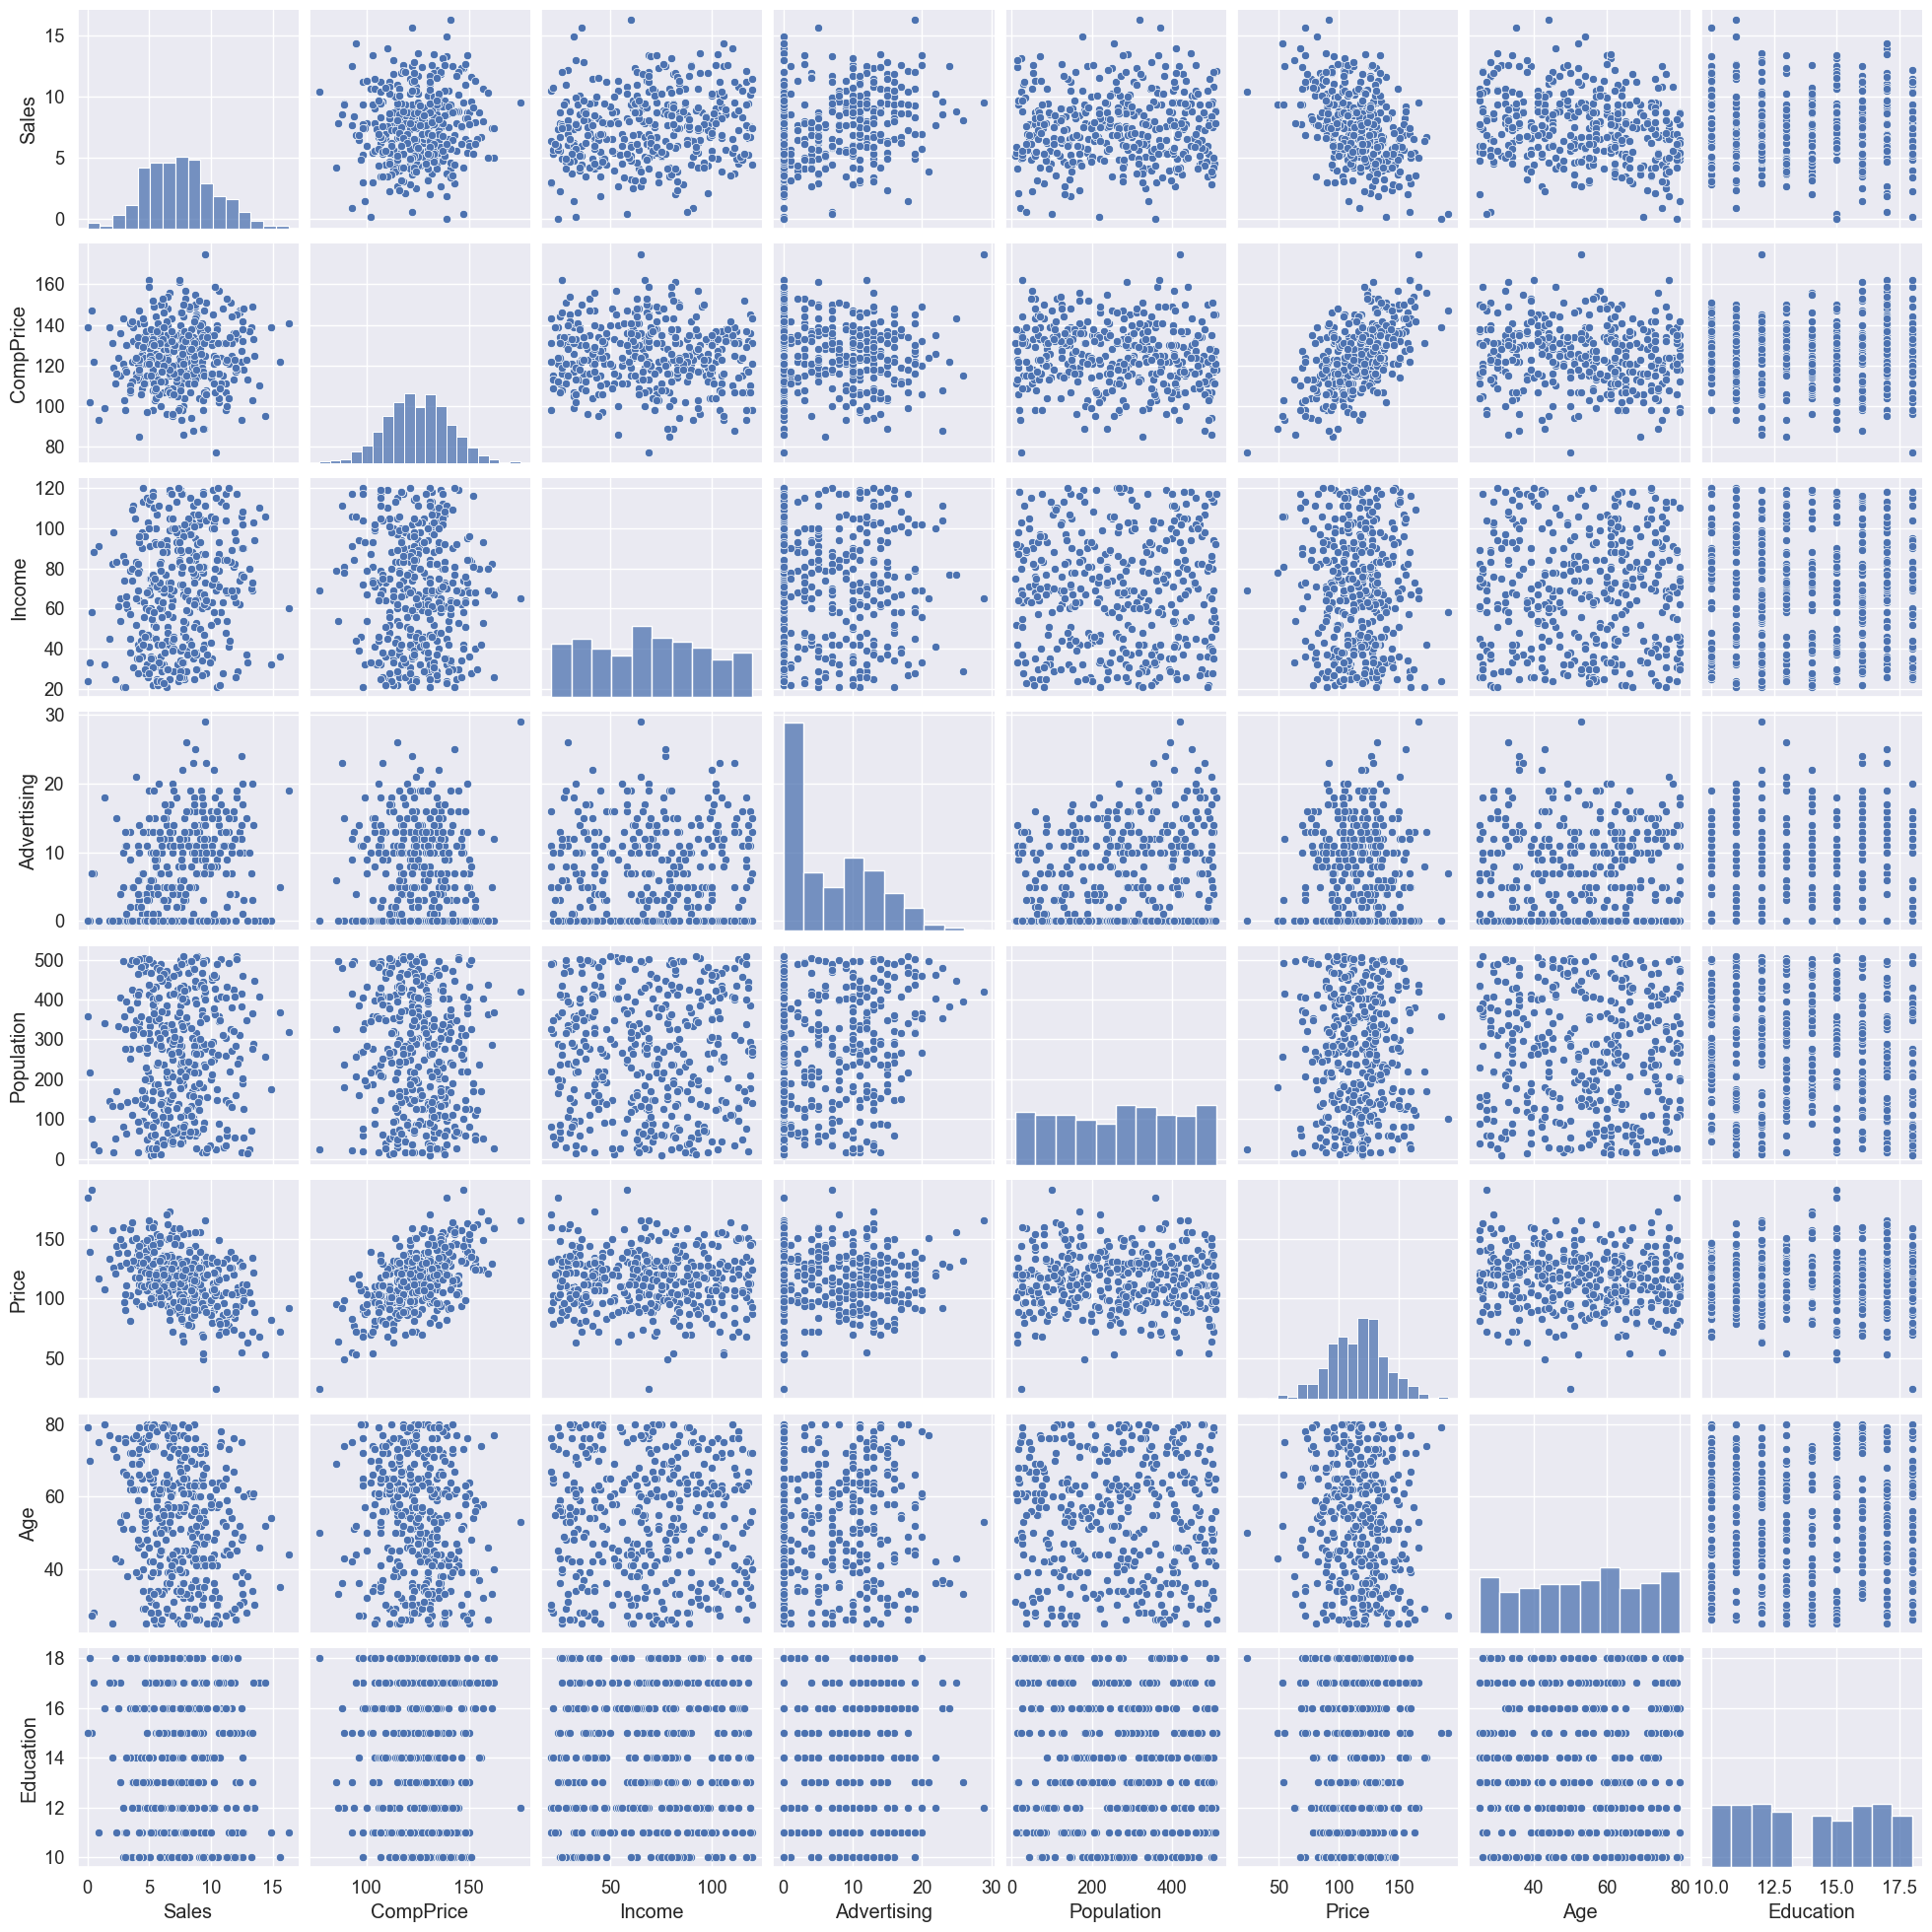

In [8]:
#graphical summary
sns.set(font_scale = 1.2)
sns.pairplot(carseats)
plt.show()

There are no clear patterns and relationships in the data. We can identify linear relationships only between price, sales and compprice, as would be expected. It is surprising that there are no other linear relationships.

I will now use the Machine Learning workflow to train three models - classification tree, random forest, and boosting methods for classifying Sales <= 8 versus Sales > 8.

#### Step 1: Splitting the data into test and non-test sets

In [9]:
c_train, c_test = train_test_split(carseats, train_size = 0.8, random_state = 425, stratify = carseats.y)
#stratify preserves the original proportion of classes in the output variable while splitting
print("Train set dataset size:", c_train.shape)
print("Test set dataset size:", c_test.shape)

Train set dataset size: (320, 12)
Test set dataset size: (80, 12)


In [10]:
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US    y  
0         17   Yes  Yes  Yes  
1         10   Yes  Yes  Yes  
2         12   Yes  Yes  Yes  
3         14   Yes  Yes   No  
4         13   Yes   No   No

In [11]:
num_features = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
cat_features = ['ShelveLoc', 'Urban', 'US']
features = np.concatenate([num_features, cat_features])
# Training X and y
X_train = c_train[features]
y_train = c_train.y
# Test X and y
X_test = c_test[features]
y_test = c_test.y

#### Step 2: Preprocessing and Encoding

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

col_tf = ColumnTransformer([('encoder', OneHotEncoder(), cat_features)],remainder='passthrough')

### I Classification Tree

#### Step 3: Model

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classtree_mod = DecisionTreeClassifier(
  criterion = 'gini',
  random_state = 425
  )

#### Step 4: Building the Pipeline

In [23]:
pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", classtree_mod)
  ])
pipe

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model', DecisionTreeClassifier(random_state=425))])

#### Step 5: Creating the Tuning Grid

In [24]:
ccp_alpha_grid = np.linspace(start = 0.0, stop = 0.05, num = 100)
tuned_parameters = {
  "model__ccp_alpha": ccp_alpha_grid
  }
tuned_parameters  

{'model__ccp_alpha': array([0.        , 0.00050505, 0.0010101 , 0.00151515, 0.0020202 ,
        0.00252525, 0.0030303 , 0.00353535, 0.0040404 , 0.00454545,
        0.00505051, 0.00555556, 0.00606061, 0.00656566, 0.00707071,
        0.00757576, 0.00808081, 0.00858586, 0.00909091, 0.00959596,
        0.01010101, 0.01060606, 0.01111111, 0.01161616, 0.01212121,
        0.01262626, 0.01313131, 0.01363636, 0.01414141, 0.01464646,
        0.01515152, 0.01565657, 0.01616162, 0.01666667, 0.01717172,
        0.01767677, 0.01818182, 0.01868687, 0.01919192, 0.01969697,
        0.02020202, 0.02070707, 0.02121212, 0.02171717, 0.02222222,
        0.02272727, 0.02323232, 0.02373737, 0.02424242, 0.02474747,
        0.02525253, 0.02575758, 0.02626263, 0.02676768, 0.02727273,
        0.02777778, 0.02828283, 0.02878788, 0.02929293, 0.02979798,
        0.03030303, 0.03080808, 0.03131313, 0.03181818, 0.03232323,
        0.03282828, 0.03333333, 0.03383838, 0.03434343, 0.03484848,
        0.03535354, 0.035858

#### Step 6: Choosing the best model by CV and refitting it on the whole non-test data

In [25]:
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",     #higher AUC is better
  refit = True
  )

In [26]:
# Fit CV
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['ShelveLoc',
                                                                          'Urban',
                                                                          'US'])])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=425))]),
             param_grid={'model__ccp_alpha': array([0.        , 0.00050505, 0.0010101 , 0.00151515, 0.0020202 ,
       0.00252525, 0.0030303 , 0.00353535, 0.0040404 , 0.00...
       0.03282828, 0.03333333, 0.03383838, 0.03434343, 0.03484848,
       0.03535354, 0.03585859, 0.03636364, 

<Figure size 640x480 with 0 Axes>

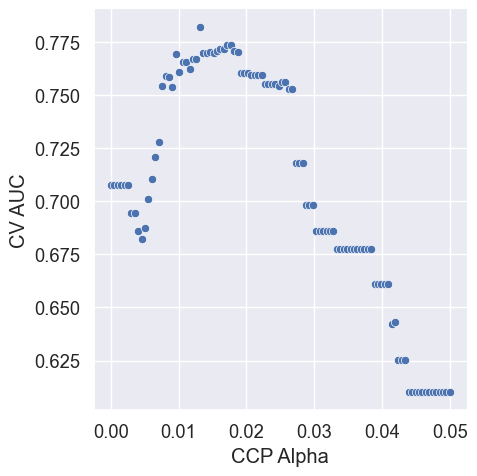

In [27]:
#Visualising the CV results

cv_res = pd.DataFrame({
  "ccp_alpha": np.array(search.cv_results_["param_model__ccp_alpha"]),
  "auc": search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  data = cv_res,
  x = "ccp_alpha",
  y = "auc"
  ).set(
    xlabel = "CCP Alpha",
    ylabel = "CV AUC"
)
plt.show()

Visually it seems like the AUC is maximised at approximately an alpha of 0.015.

In [28]:
search.best_score_

0.7818276778803094

In [29]:
#training accuracy
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_score(
  y_train,
  search.best_estimator_.predict(X_train)
  )

0.853125

In [33]:
#training auc
roc_auc_score(
  y_train,
  search.best_estimator_.predict_proba(X_train)[:, 1]   #only selecting predicted probs of positive class- needed for this fnc
  )

0.8988650591704026

The training metrics look good! An AUC of approximately 0.9 is great and indicates an almost perfect classifier.

#### Step 7: Finalising and Testing the Model

In [34]:
#the best model fit on training data
search.best_estimator_

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.013131313131313131,
                                        random_state=425))])

We can see that the best fit model has an alpha of 0.013.

In [71]:
#finding the column names used in the final model to define feature names for plotting tree

best_estimator = search.best_estimator_

#creating a list to store the column names
column_names = list(X_train.columns)

#looping through each step in the pipeline
for step in best_estimator.steps[:-1]:
    # If the step is a transformer, get the output column names and update the list
    if hasattr(step[1], 'get_feature_names_out'):
        output_columns = step[1].get_feature_names_out(input_features=column_names)
        column_names = list(output_columns)
    # If the step is not a transformer, skip it
    else:
        continue
print(column_names)


['encoder__ShelveLoc_Bad', 'encoder__ShelveLoc_Good', 'encoder__ShelveLoc_Medium', 'encoder__Urban_No', 'encoder__Urban_Yes', 'encoder__US_No', 'encoder__US_Yes', 'remainder__CompPrice', 'remainder__Income', 'remainder__Advertising', 'remainder__Population', 'remainder__Price', 'remainder__Age', 'remainder__Education']


In [100]:
#creating feature name array based on encoded columns for visualising the best tree
feature_names = np.concatenate([ 
    ['ShelveLoc:Bad', 'ShelveLoc:Good', 'ShelveLoc:Medium'],
    ['Urban:No', 'Urban:Yes'],
    ['US:No', 'US:Yes'], features[:-3]
    ])
feature_names

array(['ShelveLoc:Bad', 'ShelveLoc:Good', 'ShelveLoc:Medium', 'Urban:No',
       'Urban:Yes', 'US:No', 'US:Yes', 'CompPrice', 'Income',
       'Advertising', 'Population', 'Price', 'Age', 'Education'],
      dtype='<U16')

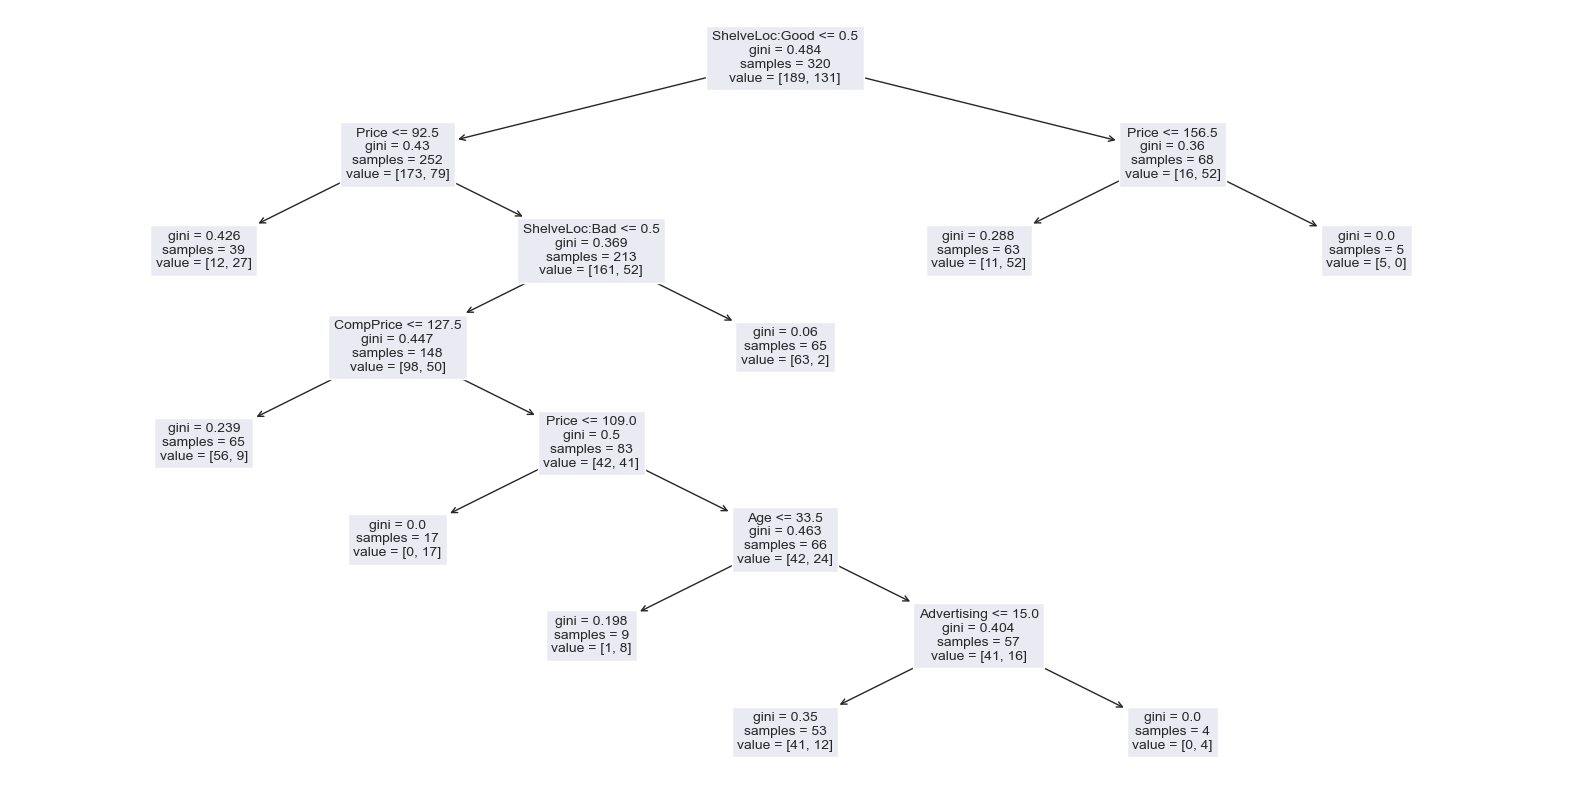

In [79]:
plt.figure(figsize=(20,10))
plot_tree(search.best_estimator_['model'], feature_names = feature_names,fontsize=10)
plt.show()

In [83]:
y_train.value_counts()

No     189
Yes    131
Name: y, dtype: int64

This implies that the first value in every output list denotes the number of sales < 8 ("No").

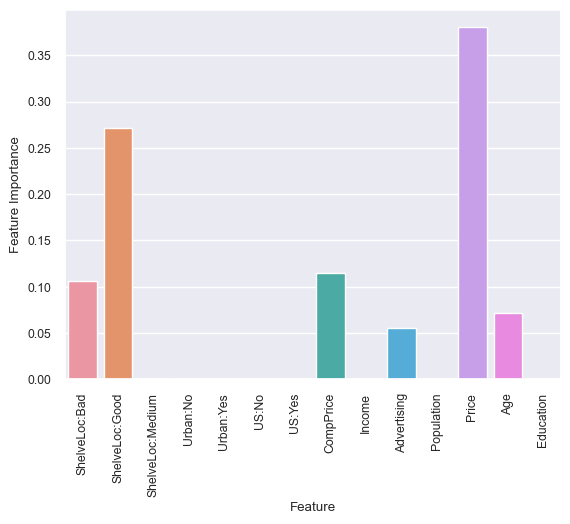

In [113]:
#feature importance

vi_df = pd.DataFrame({
  "feature": feature_names,
  "vi": search.best_estimator_['model'].feature_importances_
  })

plt.figure()
sns.set(font_scale = 0.8)
sns.barplot(
  data = vi_df,
  x = "feature",
  y = "vi"
  ).set(
    xlabel = "Feature",
    ylabel = "Feature Importance"
)
plt.xticks(rotation = 90);
plt.show()

This shows that the most important factors that affect Sales levels are Price, Shelf Life, CompPrice, Age and Advertising. It is also interesting to see that only Good/Bad shelf locations make a difference!

In [114]:
#testing accuracy
accuracy_score(y_test,search.best_estimator_.predict(X_test))

0.8

In [116]:
#testing auc
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.7511283043197936

The testing accuracy is the same as training. However, the AUC has fallen in case of testing data (as expected). However, it is still quite high and represents a good model.

### II Random Forest

#### Step 3: Model

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf_mod = RandomForestClassifier(
  n_estimators = 100, #no of trees
  criterion = 'gini',
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

#### Step 4: Building the Pipeline

In [119]:
pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", rf_mod)
  ])
pipe

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 RandomForestClassifier(max_features='sqrt', oob_score=True,
                                        random_state=425))])

#### Step 5: Creating the Tuning Grid

In [120]:
B_grid = [50, 75, 100, 125, 150, 200]
m_grid = ['sqrt', 1.0]
tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }
tuned_parameters 

{'model__n_estimators': [50, 75, 100, 125, 150, 200],
 'model__max_features': ['sqrt', 1.0]}

#### Step 6: Choosing the best model by CV and refitting it on the whole non-test data

In [121]:
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  refit = True
  )

In [122]:
# Fit CV
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['ShelveLoc',
                                                                          'Urban',
                                                                          'US'])])),
                                       ('model',
                                        RandomForestClassifier(max_features='sqrt',
                                                               oob_score=True,
                                                               random_state=425))]),
             param_grid={'model__max_features': ['sqrt', 1.0],
                         'model__n_estimators': [50, 75, 10

<Figure size 640x480 with 0 Axes>

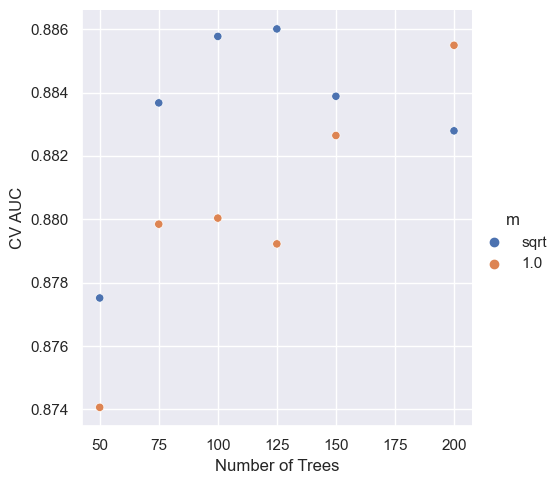

In [124]:
#Visualising the CV results
cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "auc": search.cv_results_["mean_test_score"],
  "m": search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.set(font_scale = 1)
sns.relplot(
  data = cv_res,
  x = "B",
  y = "auc",
  hue = "m"
  ).set(
    xlabel = "Number of Trees",
    ylabel = "CV AUC"
)
plt.show()

Visually it seems like the AUC is maximised at with 125 trees using the 'sqrt' function to chose the number of subset features.

In [125]:
#training accuracy
accuracy_score(
  y_train,
  search.best_estimator_.predict(X_train)
  )

1.0

In [126]:
#training auc
roc_auc_score(
  y_train,
  search.best_estimator_.predict_proba(X_train)[:, 1]
  )

1.0

Such perfect accuracy and AUC is most likely due to overfitting.

#### Step 7: Finalising and Testing the Model

In [127]:
#the best model fit on training data
search.best_estimator_

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 RandomForestClassifier(max_features='sqrt', n_estimators=125,
                                        oob_score=True, random_state=425))])

<Figure size 640x480 with 0 Axes>

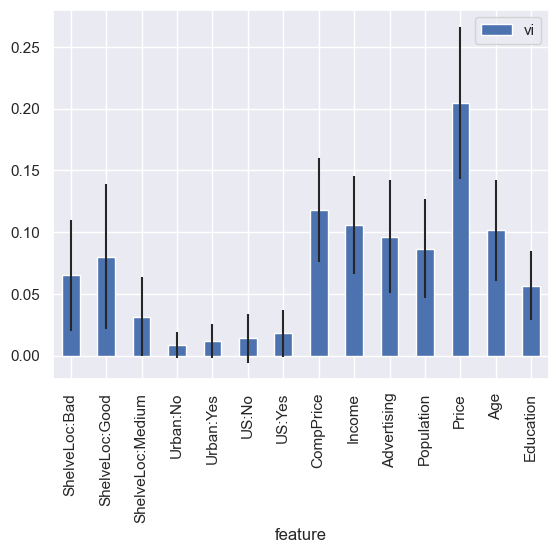

In [131]:
#feature importance

vi_df = pd.DataFrame({
  "feature": feature_names,
  "vi": search.best_estimator_['model'].feature_importances_,
  "vi_std": np.std([tree.feature_importances_ for tree in search.best_estimator_['model'].estimators_], axis = 0)
  })

plt.figure()
vi_df.plot.bar(x = "feature", y = "vi", yerr = "vi_std")
plt.xticks(rotation = 90)
plt.show()

This shows that the most important factors that affect Sales levels is again Price as most important. It is followed by all other features, even those that were not important in previous model. This is a feature of Random Forests as it gives every predictor a chance. However, the importance measures have large variance, implying that we cannot make strong conclusions about the same.

In [134]:
#testing accuracy
accuracy_score(y_test,search.best_estimator_.predict(X_test))

0.85

In [136]:
#testing auc
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.9371373307543521

We find that both the AUC and accuracy have fallen compared to training dataset. However, the results are much higher than the single Classification Tree model!

### III Boosting

#### Step 3: Model

In [140]:
from sklearn.ensemble import AdaBoostClassifier

bst_mod = AdaBoostClassifier(
  base_estimator = DecisionTreeClassifier(max_depth = 3),
  n_estimators = 50,
  learning_rate = 1.0,
  random_state = 425
  )

#### Step 4: Building the Pipeline

In [141]:
pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", bst_mod)
  ])
pipe

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                    random_state=425))])

#### Step 5: Creating the Tuning Grid

In [145]:
d_grid = [
  DecisionTreeClassifier(max_depth = 1),
  DecisionTreeClassifier(max_depth = 2),
  DecisionTreeClassifier(max_depth = 3),
  DecisionTreeClassifier(max_depth = 4)
  ]
B_grid = np.linspace(10, 100, 10).astype(int)
#lambda_grid = [0.2, 0.4, 0.6, 0.8, 1.0]
lambda_grid = np.linspace(start = 0.1, stop = 0.2, num = 10)
tuned_parameters = {
  "model__base_estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }
tuned_parameters 

{'model__base_estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=4)],
 'model__n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 'model__learning_rate': array([0.1       , 0.11111111, 0.12222222, 0.13333333, 0.14444444,
        0.15555556, 0.16666667, 0.17777778, 0.18888889, 0.2       ])}

#### Step 6: Choosing the best model by CV and refitting it on the whole non-test data

In [146]:
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  refit = True
  )

In [147]:
# Fit CV
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['ShelveLoc',
                                                                          'Urban',
                                                                          'US'])])),
                                       ('model',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                           random_state=425))]),
             param_grid={'model__base_estimator': [DecisionTreeClassifier(max_depth=1),
                                                   DecisionTreeClassifier(max_depth=2),
  

<Figure size 640x480 with 0 Axes>

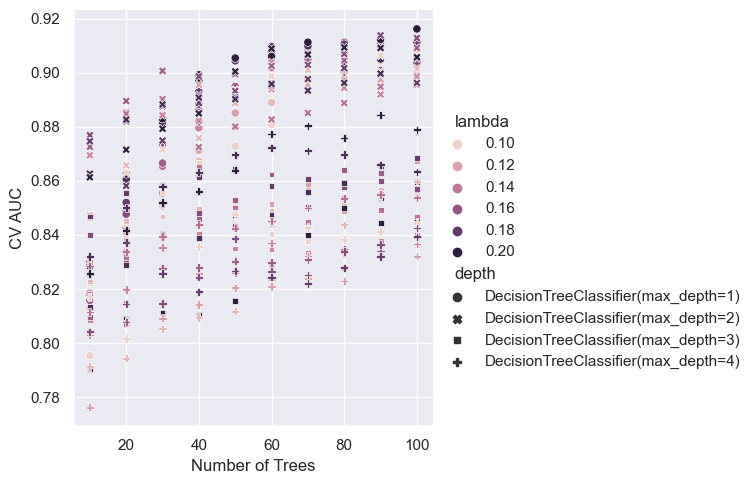

In [149]:
#Visualising the CV results

cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "auc": search.cv_results_["mean_test_score"],
  "lambda": search.cv_results_["param_model__learning_rate"],
  "depth": search.cv_results_["param_model__base_estimator"],
  })

plt.figure()
sns.relplot(
  data = cv_res,
  x = "B",
  y = "auc",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "Number of Trees",
    ylabel = "CV AUC"
)
plt.show()

Visually, it looks like the AUC is maximised at 100 trees starting with a base learner as a tree of max depth = 1 and with a learning rate of 0.2.

In [150]:
#training accuracy
accuracy_score(
  y_train,
  search.best_estimator_.predict(X_train)
  )

0.9375

In [151]:
#training auc
roc_auc_score(
  y_train,
  search.best_estimator_.predict_proba(X_train)[:, 1]
  )

0.9798659073468234

#### Step 7: Finalising and Testing the Model

In [152]:
search.best_estimator_

Pipeline(steps=[('col_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('model',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                    learning_rate=0.2, n_estimators=100,
                                    random_state=425))])

In [153]:
#testing accuracy
accuracy_score(y_test,search.best_estimator_.predict(X_test))

0.9125

In [154]:
#testing auc
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.9716312056737588

The results have improved quite a bit compared to single Classification Tree and Random Forest. Boosting returns the highest accuracy and AUC values for the testing data and is the best model of the three!

### Conclusion:

The best out of sample performance (highest accuracy and AUC values) is seen in case of Boosting model with 100 trees, base learner with max depth =1 and a learning rate = 0.2.